In [1]:
from tqdm.notebook import tqdm 
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89.,  96., 73.]
x2_data = [80., 88., 91.,  98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b  = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

Tensor("add_2:0", dtype=float32)


In [3]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 77437.828125 
Prediction :
[ -99.19784 -109.40472 -112.99919 -123.97137  -79.7757 ]

Step : 1 
Cost : 24279.19140625 
Prediction :
[ 9.473044 21.207357 15.696277 16.174658 19.847952]

Step : 2 
Cost : 7616.7783203125 
Prediction :
[70.314384 94.33191  87.74828  94.63738  75.6231  ]

Step : 3 
Cost : 2393.99365234375 
Prediction :
[104.37774 135.2713  128.08772 138.5659  106.84909]

Step : 4 
Cost : 756.9252319335938 
Prediction :
[123.44907 158.1914  150.67244 163.15997 124.3309 ]

Step : 5 
Cost : 243.7870330810547 
Prediction :
[134.12694 171.0232  163.31697 176.92944 134.11786]

Step : 6 
Cost : 82.94224548339844 
Prediction :
[140.10559 178.2069  170.39633 184.63858 139.59674]

Step : 7 
Cost : 32.522682189941406 
Prediction :
[143.45332 182.22841 174.35994 188.95477 142.6637 ]

Step : 8 
Cost : 16.715335845947266 
Prediction :
[145.32811 184.47957 176.57921 191.37138 144.3803 ]

Step : 9 
Cost : 11.757254600524902 
Prediction :
[146.37825 185.73953 177.82181 192.

### 피쳐값이 3개이다.

In [4]:
# import tensorflow as tf
# 앞에랑 다른 것은 행렬식으로 간단하게 표현했다는 것이다.
# cost값이 적은 것으로 보아 학습속도나 결과값도 좋다.

tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3]) 
# 인풋 레이어
# 몇천번 더 넣어줄 수 있으니까 None이다.
Y = tf.placeholder(tf.float32, shape=[None, 1]) 
# 아웃풋 레이어
# 몇천번 더 넣어줄 수 있으니까 None이다.

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# 머신러닝 내가 직접해본다.

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [5]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 105818.296875 
Prediction :
[[-133.5243 ]
 [-164.79396]
 [-160.21033]
 [-174.73906]
 [-126.36729]]

Step : 1 
Cost : 33173.4765625 
Prediction :
[[ -6.490195]
 [-12.106489]
 [ -9.765766]
 [-10.908591]
 [ -9.90481 ]]

Step : 2 
Cost : 10403.1865234375 
Prediction :
[[64.63107]
 [73.37793]
 [74.46248]
 [80.81395]
 [55.29867]]

Step : 3 
Cost : 3265.9052734375 
Prediction :
[[104.44882 ]
 [121.237816]
 [121.618645]
 [132.16594 ]
 [ 91.80412 ]]

Step : 4 
Cost : 1028.743896484375 
Prediction :
[[126.74086 ]
 [148.03314 ]
 [148.01952 ]
 [160.91591 ]
 [112.242615]]

Step : 5 
Cost : 327.5100402832031 
Prediction :
[[139.2209 ]
 [163.03517]
 [162.80026]
 [177.01187]
 [123.68577]]

Step : 6 
Cost : 107.70799255371094 
Prediction :
[[146.20757]
 [171.43456]
 [171.0753 ]
 [186.02328]
 [130.0928 ]]

Step : 7 
Cost : 38.80906677246094 
Prediction :
[[150.11868]
 [176.13737]
 [175.70807]
 [191.06834]
 [133.68027]]

Step : 8 
Cost : 17.210224151611328 
Prediction :
[[152.30794]
 [1

In [7]:
# import tensorflow as tf
# import numpy as np
# 다 코드로 입력할 수 없으니까 csv로 넣어서 한다.

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1] #0,1,2
y_data = xy[:, [-1]] #마지막 값이 out_put이다.

# Make sure the shape and data are OK
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

x_data.shape : (25, 3), 	len(x_data) : 25 
x_data : 
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
-------------------------
y_data.shape : (25, 1)  
y_data : 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [12]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 50 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 211.6978759765625 
Prediction :
[[146.40254]
 [177.59459]
 [174.47066]
 [185.3654 ]
 [139.80957]
 [ 96.34184]
 [131.57137]
 [ 87.39416]
 [160.80339]
 [138.98361]
 [132.02577]
 [129.19789]
 [184.98274]
 [160.57907]
 [131.92613]
 [175.66246]
 [159.08739]
 [154.4699 ]
 [176.84369]
 [157.26933]
 [156.07466]
 [162.03996]
 [149.99529]
 [158.60556]
 [185.93338]]

Step : 1 
Cost : 156.012451171875 
Prediction :
[[149.8618  ]
 [181.75455 ]
 [178.5682  ]
 [189.83012 ]
 [142.98096 ]
 [ 98.683655]
 [134.91608 ]
 [ 89.87735 ]
 [164.6944  ]
 [142.59271 ]
 [135.24658 ]
 [132.37552 ]
 [189.2138  ]
 [164.09332 ]
 [135.28677 ]
 [179.88577 ]
 [162.43227 ]
 [158.48471 ]
 [180.87671 ]
 [160.87813 ]
 [159.99637 ]
 [165.94458 ]
 [153.73352 ]
 [162.08813 ]
 [190.24332 ]]

Step : 2 
Cost : 135.37112426757812 
Prediction :
[[151.96439]
 [184.2839 ]
 [181.05905]
 [192.54509]
 [144.90875]
 [100.10862]
 [136.95099]
 [ 91.38955]
 [167.0615 ]
 [144.79034]
 [137.20552]
 [134.30891]
 [191.785  ]
 [16


Step : 800 
Cost : 73.08719635009766 
Prediction :
[[153.88295]
 [187.92508]
 [183.83405]
 [197.0845 ]
 [146.76588]
 [103.97604]
 [142.23187]
 [ 97.89725]
 [172.62866]
 [153.42113]
 [141.1328 ]
 [139.35263]
 [193.11876]
 [165.25299]
 [143.00424]
 [187.4731 ]
 [162.10527]
 [167.91473]
 [184.15176]
 [163.94003]
 [168.2262 ]
 [173.13255]
 [161.0331 ]
 [162.57248]
 [195.71068]]

Step : 850 
Cost : 70.83242797851562 
Prediction :
[[153.81825 ]
 [187.90463 ]
 [183.77782 ]
 [197.1033  ]
 [146.69852 ]
 [104.056656]
 [142.349   ]
 [ 98.12645 ]
 [172.72072 ]
 [153.68854 ]
 [141.18048 ]
 [139.45567 ]
 [192.97949 ]
 [165.02638 ]
 [143.13933 ]
 [187.52345 ]
 [161.80994 ]
 [168.09262 ]
 [183.99745 ]
 [163.81032 ]
 [168.34325 ]
 [173.18796 ]
 [161.11702 ]
 [162.3187  ]
 [195.64267 ]]

Step : 900 
Cost : 68.6595687866211 
Prediction :
[[153.75557 ]
 [187.884   ]
 [183.72282 ]
 [197.12193 ]
 [146.6316  ]
 [104.134895]
 [142.4644  ]
 [ 98.35222 ]
 [172.81007 ]
 [153.94978 ]
 [141.22733 ]
 [139.55612 ]


In [13]:
# 앞의 5개보다 25개가 더 많으니 cost는 36이 적당한 것인가?
# range를 늘린다는 것은?

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 50 == 0 or step < 10 :
        # print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))
        print("Step : {} \tCost : {} ".format(step, cost_val))

  0%|          | 0/2001 [00:00<?, ?it/s]

Step : 0 	Cost : 211.6978759765625 
Step : 1 	Cost : 156.012451171875 
Step : 2 	Cost : 135.37112426757812 
Step : 3 	Cost : 127.68655395507812 
Step : 4 	Cost : 124.7925033569336 
Step : 5 	Cost : 123.66974639892578 
Step : 6 	Cost : 123.20184326171875 
Step : 7 	Cost : 122.97607421875 
Step : 8 	Cost : 122.83995056152344 
Step : 9 	Cost : 122.7370376586914 
Step : 50 	Cost : 119.35494995117188 
Step : 100 	Cost : 115.38525390625 
Step : 150 	Cost : 111.56480407714844 
Step : 200 	Cost : 107.88755798339844 
Step : 250 	Cost : 104.34794616699219 
Step : 300 	Cost : 100.94047546386719 
Step : 350 	Cost : 97.66002655029297 
Step : 400 	Cost : 94.50140380859375 
Step : 450 	Cost : 91.45999145507812 
Step : 500 	Cost : 88.53114318847656 
Step : 550 	Cost : 85.71048736572266 
Step : 600 	Cost : 82.99374389648438 
Step : 650 	Cost : 80.37680053710938 
Step : 700 	Cost : 77.85584259033203 
Step : 750 	Cost : 75.42725372314453 
Step : 800 	Cost : 73.08719635009766 
Step : 850 	Cost : 70.832427

In [10]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[189.7708]]


In [11]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[135.22493]
 [186.95398]]


In [24]:
# 들어가는 데이터 순서도 중요하다.?

# import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

filename_queue = tf.train.string_input_producer(
    ['./data/data-01-test-score.csv'], shuffle=False, name='filename_queue')

# shuffle False : 데이터 순서를 자기가 섞는다.
# queue : 큐와 스택개념

reader = tf.TextLineReader() # 
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the decoded result.
# Convert CSV records to tensors. Each column maps to one tensor.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults) 

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# batch_size : 불러오는 블럭단위

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [25]:
train_x_batch

<tf.Tensor 'batch_3:0' shape=(10, 3) dtype=float32>

In [26]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Step_val = []
Cost_val = []

for step in tqdm(range(2001)):

    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    

    Step_val.append(step)
    Cost_val.append(cost_val)
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

coord.request_stop()
coord.join(threads)

  0%|          | 0/2001 [00:00<?, ?it/s]


Step : 0 
Cost : 133681.171875 
Prediction :
[[-199.88972]
 [-236.39618]
 [-234.70815]
 [-259.28687]
 [-176.08354]
 [-134.60289]
 [-200.29555]
 [-157.3839 ]
 [-224.29694]
 [-215.23264]]

Step : 1 
Cost : 55744.5078125 
Prediction :
[[-66.761475]
 [-65.32904 ]
 [-79.313614]
 [-60.38849 ]
 [-74.525665]
 [-84.620804]
 [-51.85072 ]
 [-92.719864]
 [-75.64575 ]
 [-68.67526 ]]

Step : 2 
Cost : 23196.083984375 
Prediction :
[[13.204505]
 [19.96103 ]
 [13.304473]
 [26.475136]
 [27.123466]
 [17.707535]
 [25.205345]
 [23.014671]
 [21.410896]
 [23.432701]]

Step : 3 
Cost : 5849.72314453125 
Prediction :
[[52.558   ]
 [67.01826 ]
 [40.790558]
 [86.76502 ]
 [72.92178 ]
 [69.49857 ]
 [68.989494]
 [99.97395 ]
 [88.67545 ]
 [67.541565]]

Step : 4 
Cost : 3430.180419921875 
Prediction :
[[125.179214]
 [114.81264 ]
 [106.59454 ]
 [125.04414 ]
 [110.89692 ]
 [109.18018 ]
 [115.55218 ]
 [104.80715 ]
 [111.92504 ]
 [132.71687 ]]

Step : 5 
Cost : 1041.8819580078125 
Prediction :
[[124.751945]
 [153.8615 

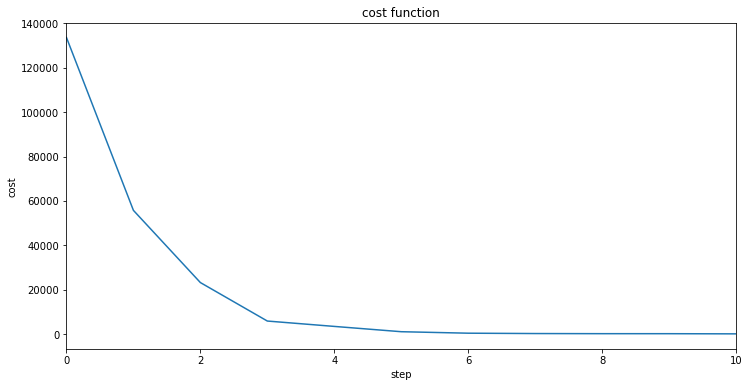

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

# Show the cost function
plt.plot(Step_val, Cost_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('cost')
plt.xlim(0,10)
plt.show()


In [28]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[192.53513]]


In [29]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[141.67981]
 [184.54729]]
